<a href="https://colab.research.google.com/github/art-lmk/Muliverse-Linear-Regression-model-for-predictiong-house-prices/blob/main/A_Model_to_Predict_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#import the necessary libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

warnings.filterwarnings('ignore')

In [8]:
#load the data
df = pd.read_csv('housing.csv')
print('Lets see whats in the file!')
print(df)
# so we have RM(Avg no.of rooms per dwelling)
#LSTAT(Lower Status Population percentage)
#PTRATIO(Pupil-Teacher Ratio per town)
#MEDV(Median Value. This is going to be our target variable)


Lets see whats in the file!
        RM  LSTAT  PTRATIO      MEDV
0    6.575   4.98     15.3  504000.0
1    6.421   9.14     17.8  453600.0
2    7.185   4.03     17.8  728700.0
3    6.998   2.94     18.7  701400.0
4    7.147   5.33     18.7  760200.0
..     ...    ...      ...       ...
484  6.593   9.67     21.0  470400.0
485  6.120   9.08     21.0  432600.0
486  6.976   5.64     21.0  501900.0
487  6.794   6.48     21.0  462000.0
488  6.030   7.88     21.0  249900.0

[489 rows x 4 columns]


In [14]:
# Exploratory Data Analysis
df.isnull().sum()#checking whether our data has missing values
df.describe()
df.describe(include='number')
df.corr()

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


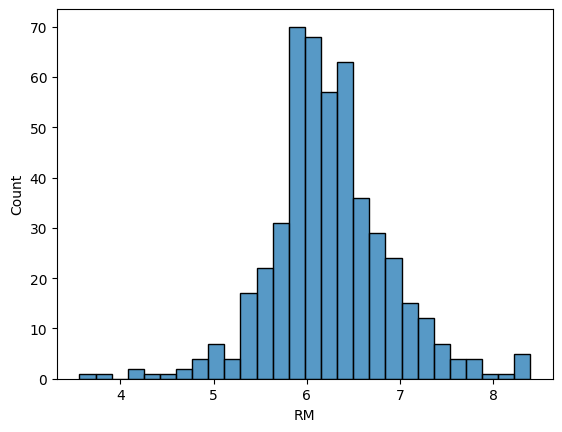

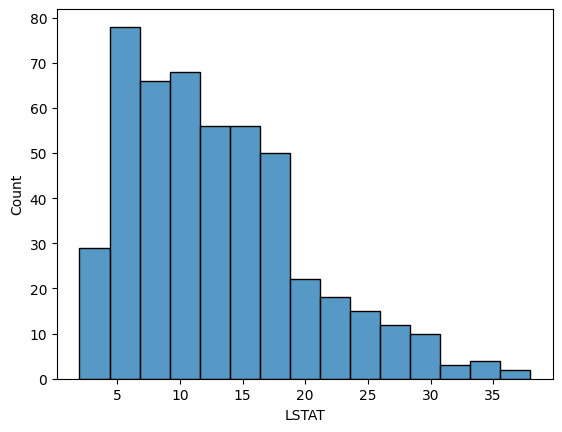

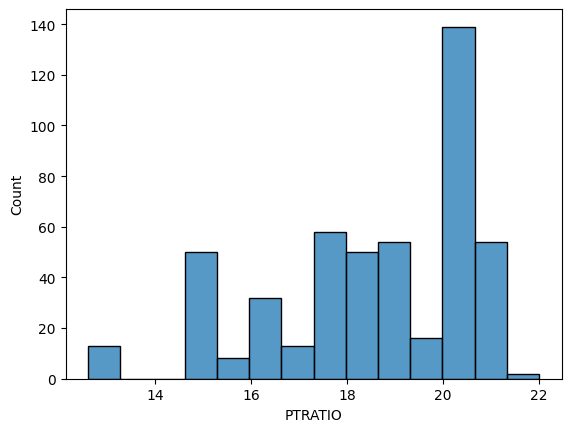

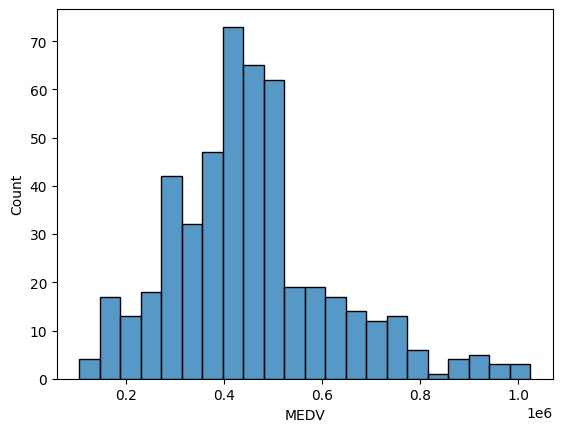

In [15]:
#histogram to see how our data is distributed
for i in df.select_dtypes(include='number').columns:
  sns.histplot(data=df, x=i)
  plt.show()


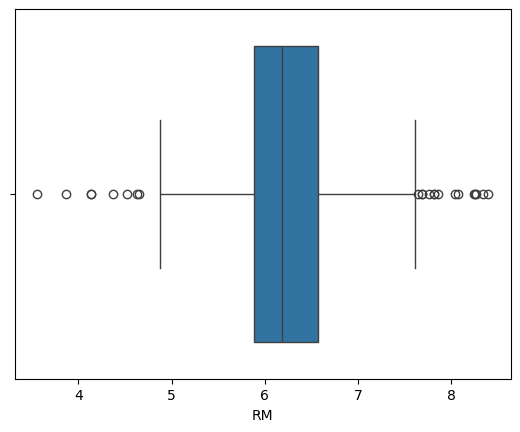

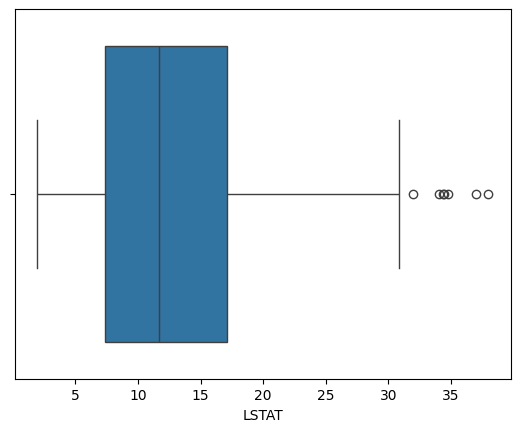

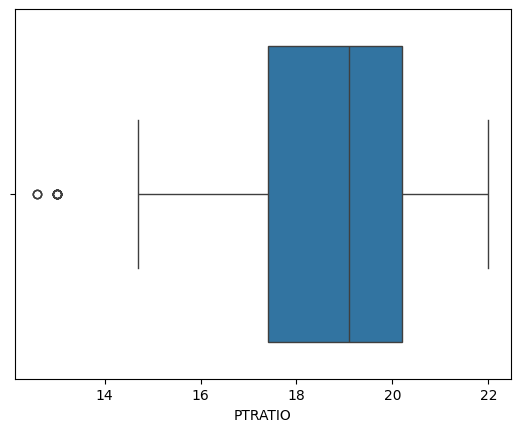

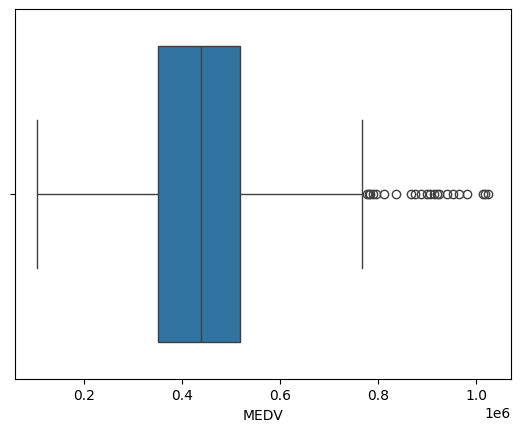

In [16]:
#boxplot to check for outliers
for i in df.select_dtypes(include='number').columns:
  sns.boxplot(data=df, x=i)
  plt.show()

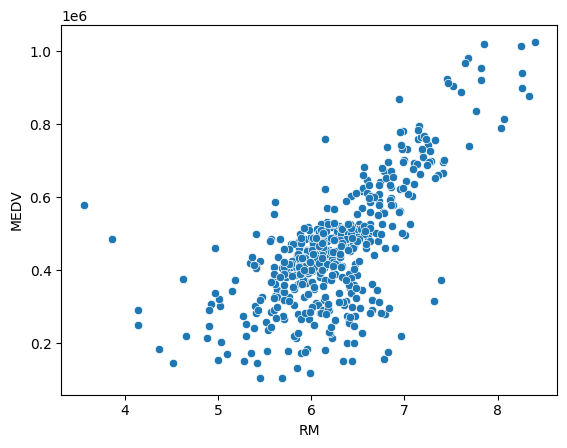

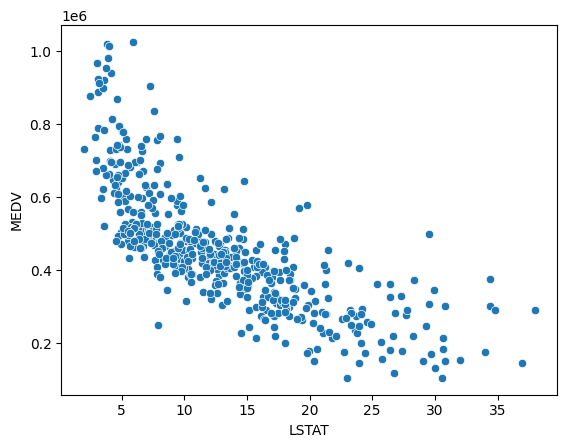

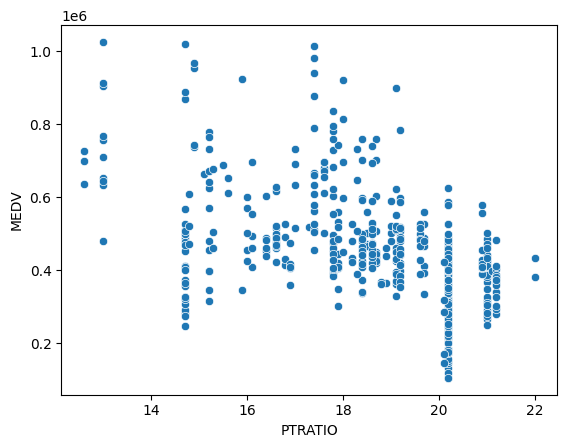

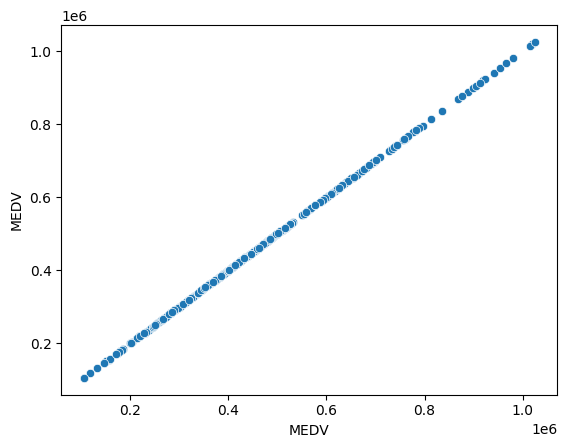

In [17]:
#scatterplots to check whether theres a relationship between the data or not
for i in df.select_dtypes(include='number').columns:
  sns.scatterplot(data=df, x=i, y='MEDV')
  plt.show()

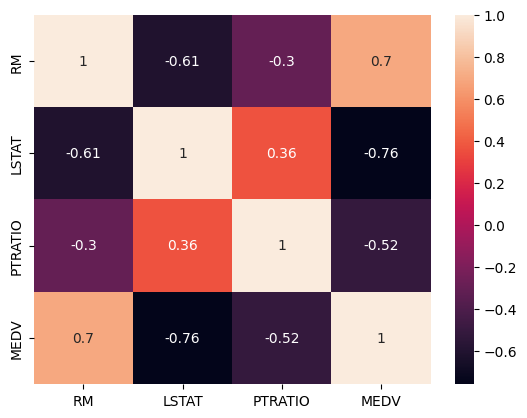

In [19]:
# heatmaps to define correlation(interprate relation and multicollinearity)
b= df.select_dtypes(include='number')
sns.heatmap(b.corr(), annot=True)
plt.show()

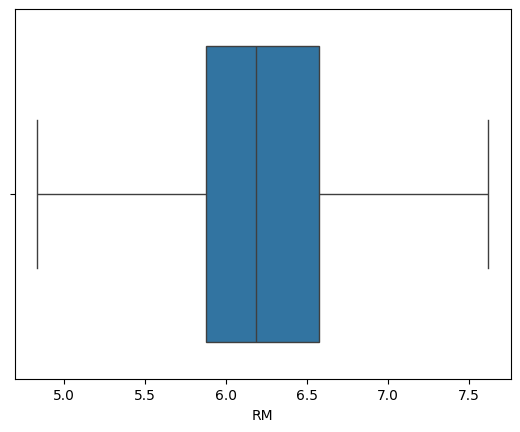

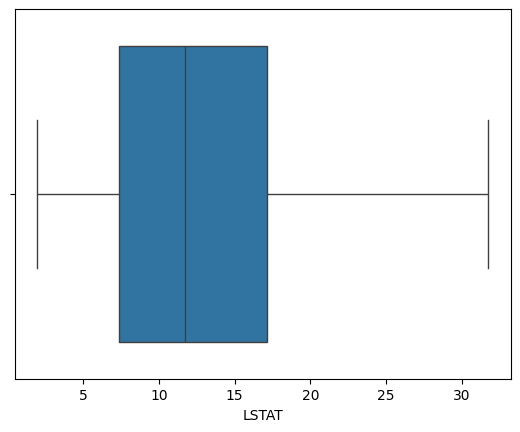

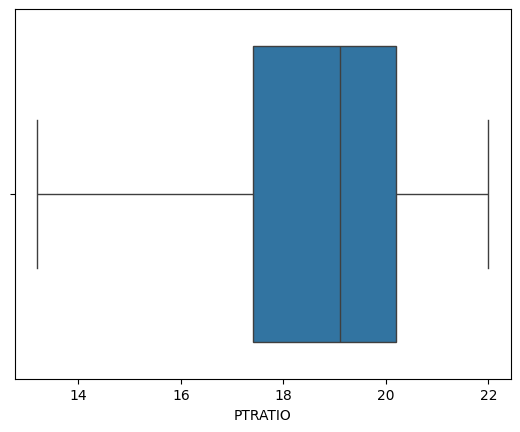

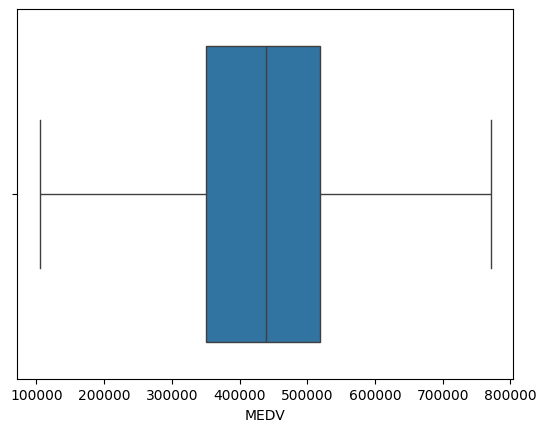

In [26]:
#lets treat our outliers
def wisker(col):
  q1 = col.quantile(0.25)
  q3 = col.quantile(0.75)
  iqr = q3 - q1
  upper = q3 + 1.5*iqr
  lower = q1 - 1.5*iqr
  return upper, lower

for col_name in df.select_dtypes(include=np.number).columns:
    upper, lower = wisker(df[col_name])
    df[col_name] = np.where(df[col_name] > upper, upper, df[col_name])
    df[col_name] = np.where(df[col_name] < lower, lower, df[col_name])


# confirm that there are no outliers using boxplots
for col_name in df.select_dtypes(include=np.number).columns:
  sns.boxplot(data=df, x=col_name)
  plt.show()

In [31]:
#lets prepare our data for the model
x= df[['RM','LSTAT','PTRATIO']]
y= df['MEDV']

#split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Training Test Size:{x_train.shape[0]}")
print("Testing Test Size:{x_test.shape[0]}")


Training Test Size:{x_train.shape[0]}
Testing Test Size:{x_test.shape[0]}


In [35]:
#create and train the model
model=LinearRegression() # create an object
model.fit(x_train, y_train)

print("Model trained successfully")
for feature, coef in zip(x.columns, model.coef_):
  print(f"{feature}: {coef}")

Model trained successfully
RM: 76807.05720593638
LSTAT: -11147.592854188153
PTRATIO: -17358.47252629477


In [39]:
# evaluate the model
y_pred = model.predict(x_test)
results_df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


results_df['Difference']= results_df['Actual']-results_df['Predicted']
print(results_df.head(20))

       Actual      Predicted     Difference
451  401100.0  340660.114572   60439.885428
84   501900.0  500597.200543    1302.799457
434  319200.0  401111.496417  -81911.496417
472  147000.0  237968.806267  -90968.806267
428  247800.0  316384.857866  -68584.857866
312  388500.0  405564.377956  -17064.377956
30   266700.0  260583.693308    6116.306692
220  770700.0  677590.269368   93109.730632
482  367500.0  364375.674024    3124.325976
231  489300.0  575327.513678  -86027.513678
9    396900.0  444925.448306  -48025.448306
124  394800.0  362275.678732   32524.321268
422  268800.0  264743.738410    4056.261590
204  405300.0  263126.968556  142173.031444
360  279300.0  372659.626451  -93359.626451
70   508200.0  522924.886653  -14724.886653
430  264600.0  384461.840088 -119861.840088
431  296100.0  360553.142389  -64453.142389
364  228900.0  355318.284063 -126418.284063
211  451500.0  410883.481102   40616.518898


In [41]:
#lets see how good our model is
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


# A good r-squared is close to 1.0, hence a better fit

Mean Absolute Error: 57999.45022731897
Mean Squared Error: 5172789910.92351
Root Mean Squared Error: 71922.11002830429
R-squared: 0.7167123364456494


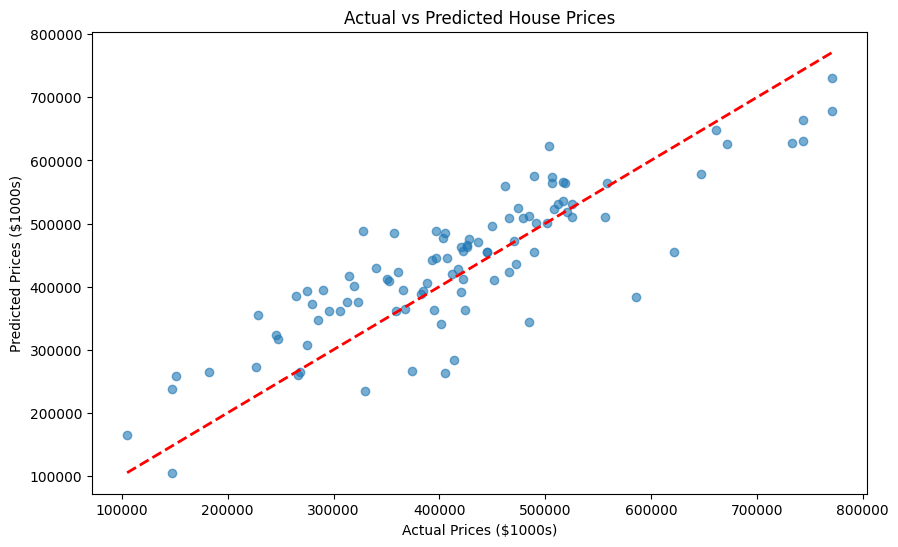

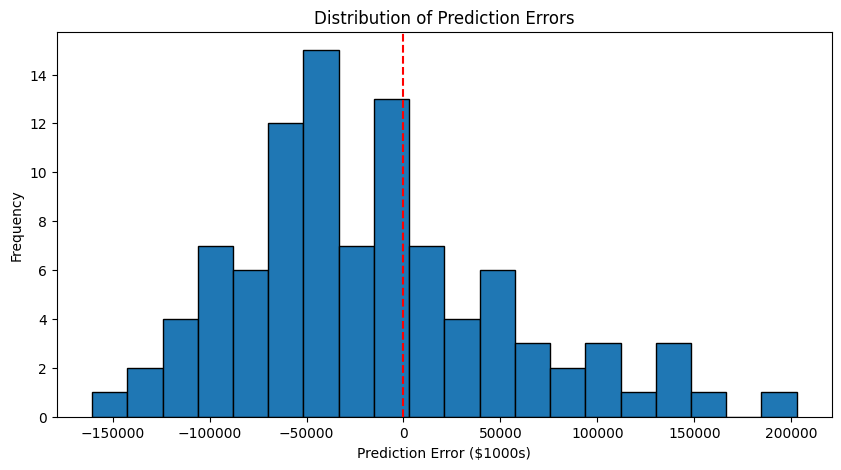

In [42]:
# Plot Actual vs Predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Prices ($1000s)')
plt.ylabel('Predicted Prices ($1000s)')
plt.title('Actual vs Predicted House Prices')

# Plot a perfect prediction line for reference
max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
plt.show()

# Plot the error distribution
plt.figure(figsize=(10, 5))
plt.hist(results_df['Difference'], bins=20, edgecolor='black')
plt.xlabel('Prediction Error ($1000s)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.axvline(x=0, color='r', linestyle='--')
plt.show()